In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import gzip
import pandas as pd
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors


In [2]:
drugbank = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbank if m is not None]
drugbank = pd.DataFrame(drugbank, columns=['mol'])



[12:49:52] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:49:52] ERROR: Could not sanitize molecule ending on line 20009
[12:49:52] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:49:52] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:49:52] ERROR: Could not sanitize molecule ending on line 250947
[12:49:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:49:52] Explicit valence for atom # 17 O, 3, is greater than permitted
[12:49:52] ERROR: Could not sanitize molecule ending on line 258130
[12:49:52] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[12:49:52] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[12:49:52] ERROR: Could not sanitize molecule ending on line 261581
[12:49:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[12:49:52] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[12:49:52] ERROR: Coul

In [3]:
with gzip.open('../data/actives_final.sdf.gz', 'r') as sdf1:
    actives = Chem.ForwardSDMolSupplier(sdf1)
    active = pd.DataFrame({'mol':mol, 'source': 'dude_active'} for mol in actives)
active

        

with gzip.open('../data/decoys_final.sdf.gz', 'r') as sdf2:
    decoys = Chem.ForwardSDMolSupplier(sdf2)
    decoy = pd.DataFrame({'mol':mol, 'source': 'dude_decoy'} for mol in decoys)
decoy

,mol,source
0,<rdkit.Chem.rdchem.Mol object at 0x7fc6740521f0>,dude_decoy
1,<rdkit.Chem.rdchem.Mol object at 0x7fc674052260>,dude_decoy
2,<rdkit.Chem.rdchem.Mol object at 0x7fc6740522d0>,dude_decoy
3,<rdkit.Chem.rdchem.Mol object at 0x7fc674052340>,dude_decoy
4,<rdkit.Chem.rdchem.Mol object at 0x7fc6740523b0>,dude_decoy
...,...,...
34183,<rdkit.Chem.rdchem.Mol object at 0x7fc67364d0e0>,dude_decoy
34184,<rdkit.Chem.rdchem.Mol object at 0x7fc67364d150>,dude_decoy
34185,<rdkit.Chem.rdchem.Mol object at 0x7fc67364d1c0>,dude_decoy
34186,<rdkit.Chem.rdchem.Mol object at 0x7fc67364d230>,dude_decoy


In [24]:
# create one pandas dataframe from drugbank, actives and decoys
joint_df = pd.concat([drugbank, active, decoy], ignore_index=True)
joint_df
# for nan values in the dataframe column 'source' fill with 'drugbank'
joint_df['source'] = joint_df['source'].fillna('drugbank')
joint_df



,mol,source
0,<rdkit.Chem.rdchem.Mol object at 0x7fc674122e30>,drugbank
1,<rdkit.Chem.rdchem.Mol object at 0x7fc674122ea0>,drugbank
2,<rdkit.Chem.rdchem.Mol object at 0x7fc674123060>,drugbank
3,<rdkit.Chem.rdchem.Mol object at 0x7fc6741230d0>,drugbank
4,<rdkit.Chem.rdchem.Mol object at 0x7fc674123140>,drugbank
...,...,...
42177,<rdkit.Chem.rdchem.Mol object at 0x7fc67364d0e0>,dude_decoy
42178,<rdkit.Chem.rdchem.Mol object at 0x7fc67364d150>,dude_decoy
42179,<rdkit.Chem.rdchem.Mol object at 0x7fc67364d1c0>,dude_decoy
42180,<rdkit.Chem.rdchem.Mol object at 0x7fc67364d230>,dude_decoy


In [25]:
# create a new column mw (molecular weight) in the dataframe and calculate the molecular weight of each molecule
joint_df['mw'] = joint_df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))

# create a columns  rings, HBA, HBD, logP, TPSA, RB, in the dataframe and calculate the values for each molecule

joint_df['rings'] = joint_df['mol'].apply(lambda x: rdMolDescriptors.CalcNumRings(x))
joint_df['HBA'] = joint_df['mol'].apply(lambda x: rdMolDescriptors.CalcNumLipinskiHBA(x))
joint_df['HBD'] = joint_df['mol'].apply(lambda x: rdMolDescriptors.CalcNumLipinskiHBD(x))
joint_df['logP'] = joint_df['mol'].apply(lambda x: Descriptors.MolLogP(x))
joint_df['TPSA'] = joint_df['mol'].apply(lambda x: rdMolDescriptors.CalcTPSA(x))
joint_df['RB'] = joint_df['mol'].apply(lambda x: rdMolDescriptors.CalcNumRotatableBonds(x))



In [26]:
# copy joint_df to a joint_df_calc dataframe
joint_df_calc = joint_df.copy()


In [27]:
joint_df_calc.head()

,mol,source,mw,rings,HBA,HBD,logP,TPSA,RB
0,<rdkit.Chem.rdchem.Mol object at 0x7fc674122e30>,drugbank,2178.985813,6,57,31,-8.11643,901.57,66
1,<rdkit.Chem.rdchem.Mol object at 0x7fc674122ea0>,drugbank,1268.641439,6,32,20,-3.10570,495.89,31
2,<rdkit.Chem.rdchem.Mol object at 0x7fc674123060>,drugbank,1068.426955,4,26,18,-4.13203,435.41,19
3,<rdkit.Chem.rdchem.Mol object at 0x7fc6741230d0>,drugbank,1429.669818,6,31,20,-0.50613,495.67,38
4,<rdkit.Chem.rdchem.Mol object at 0x7fc674123140>,drugbank,1201.841368,1,23,5,3.26900,278.80,15


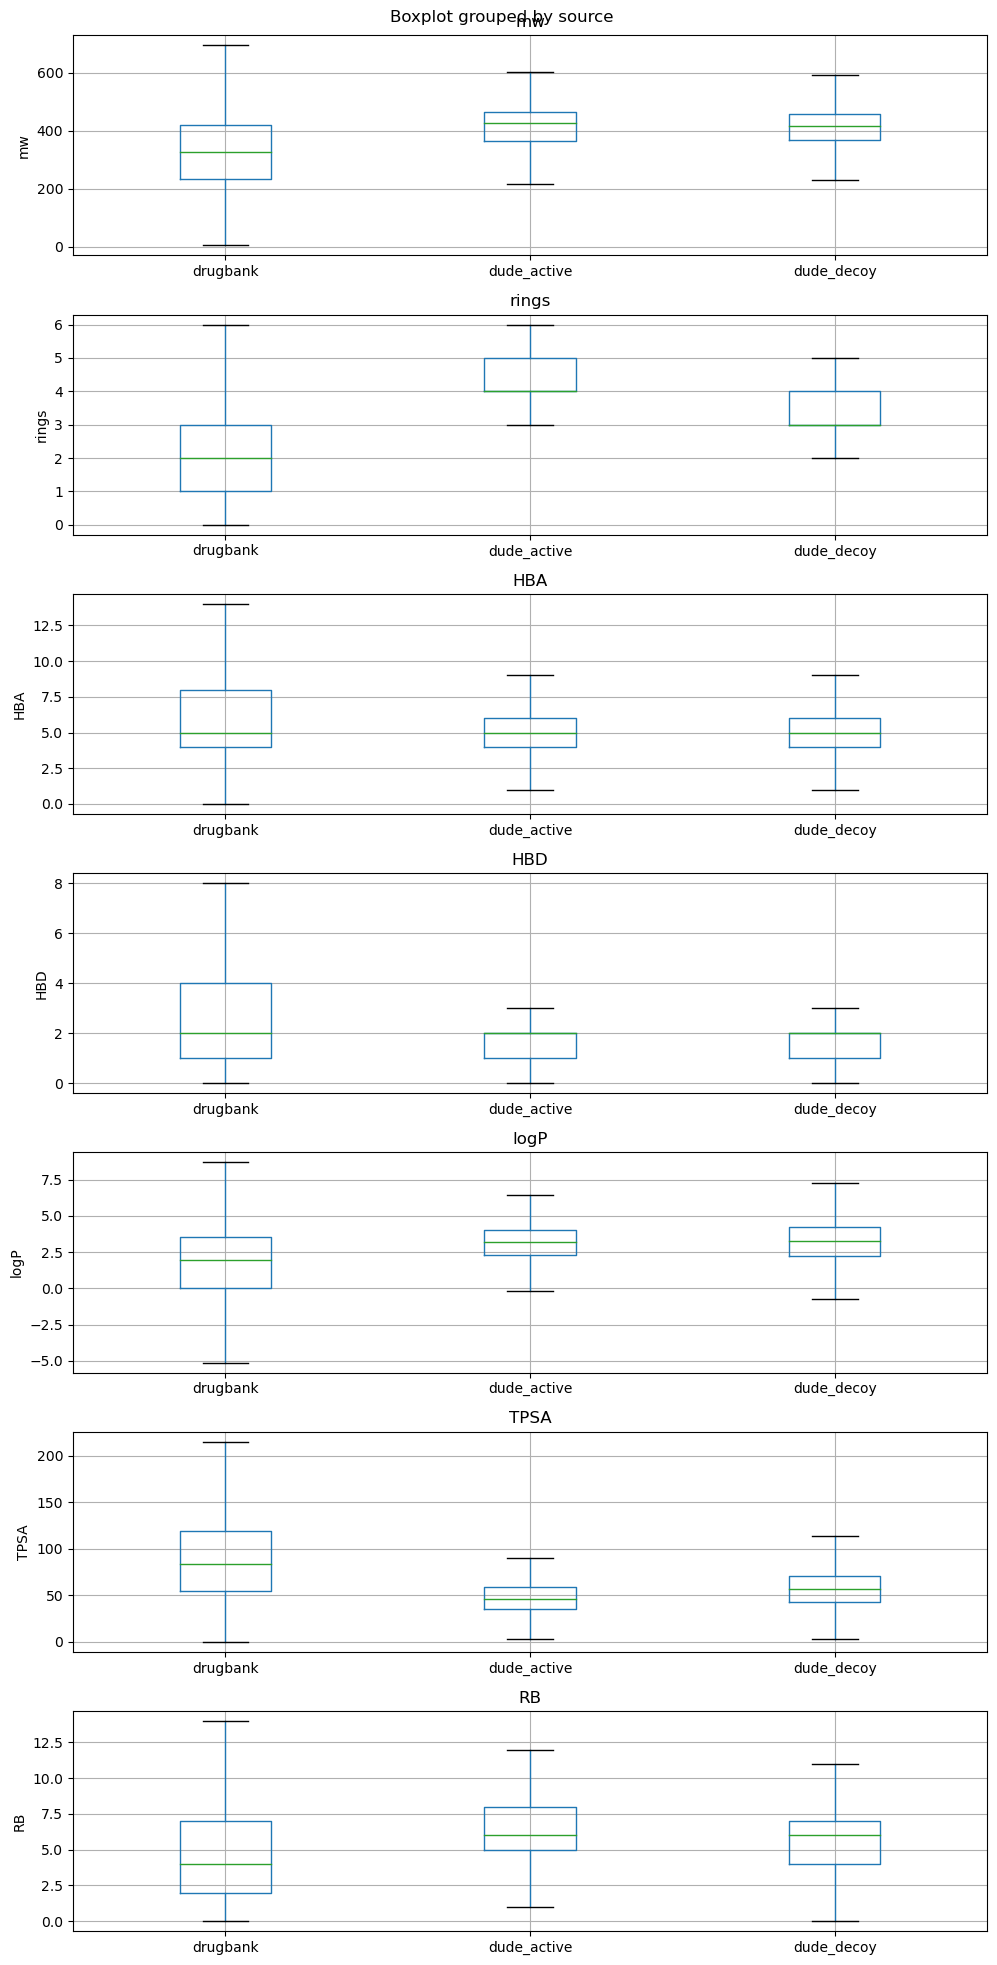

In [28]:
# vykresilt distribuci jednotlivych sloupcu v zavislosti na zdroji
import matplotlib.pyplot as plt
# using pandas and matplotlib to plot the distribution of the columns 
# in the dataframe joint_df

# create a list of columns to plot
cols = ['mw', 'rings', 'HBA', 'HBD', 'logP', 'TPSA', 'RB']

# create a figure with 7 subplots
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20))

# iterate over the columns and plot the distribution and turn off outliers
for i, col in enumerate(cols):
    joint_df_calc.boxplot(column=col, by='source', ax=axes[i], showfliers=False)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


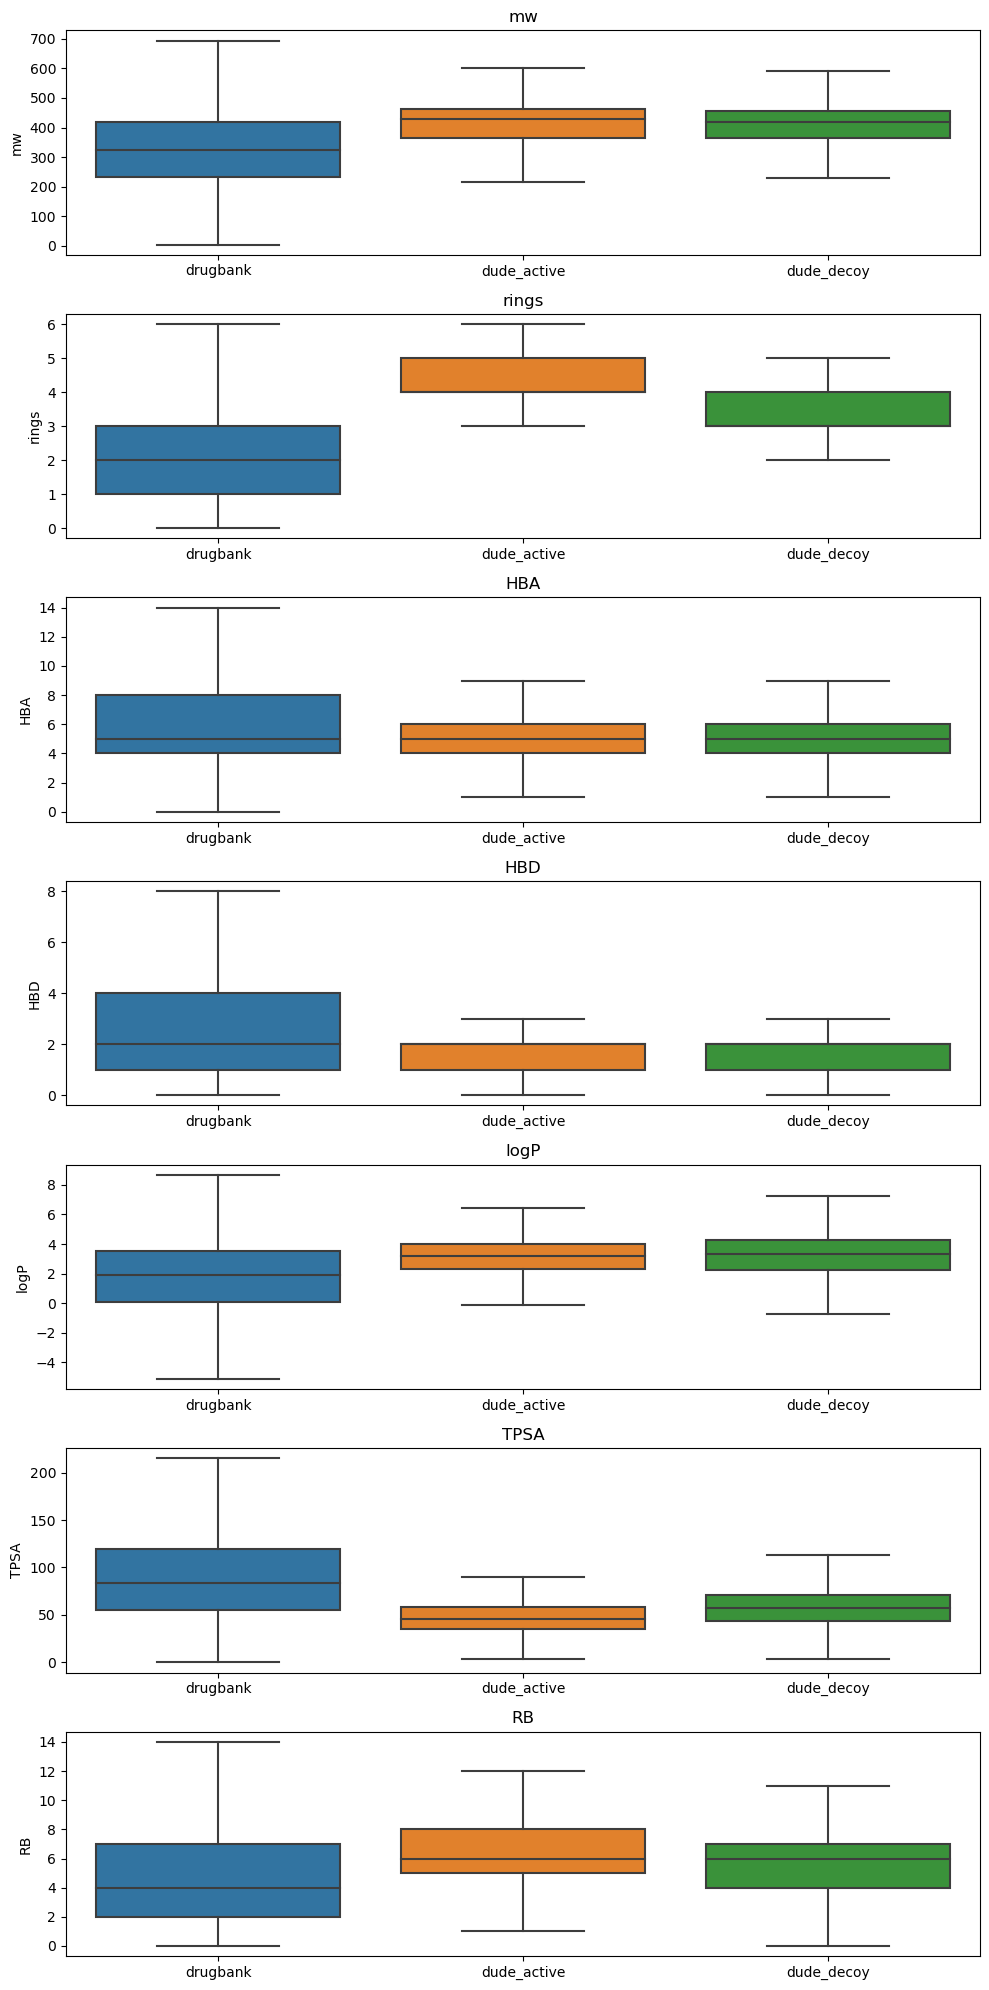

In [29]:
# create same plot with seaborn
import seaborn as sns
# using seaborn to plot the distribution of the columns
# in the dataframe joint_df

# create a list of columns to plot
cols = ['mw', 'rings', 'HBA', 'HBD', 'logP', 'TPSA', 'RB']

# create a figure with 7 subplots
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20))

# iterate over the columns and plot the distribution and turn off outliers
for i, col in enumerate(cols):
    sns.boxplot(x='source', y=col, data=joint_df_calc, ax=axes[i], showfliers=False)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


In [ ]:
# create one plot 

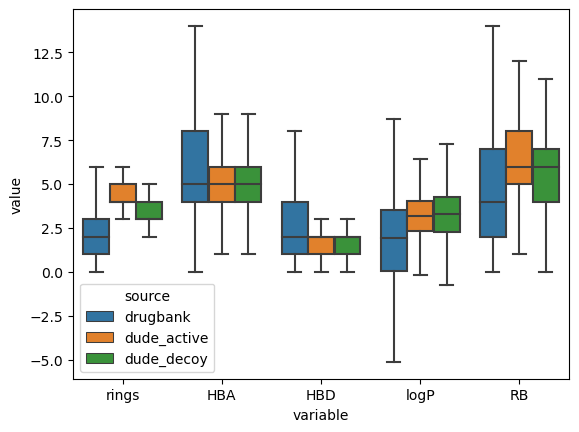

In [33]:
# using pd.melt to plot the distribution of the columns in the dataframe joint_df
# using seaborn to plot the distribution of the columns withou outliers

joint_df_melt = pd.melt(joint_df_calc, id_vars=['source'], value_vars=cols)
# plot the distribution of the columns withou outliers withou mw and tpsa
sns.boxplot(x='variable', y='value', hue='source', data=joint_df_melt[joint_df_melt['variable'].isin(['rings', 'HBA', 'HBD', 'logP', 'RB'])], showfliers=False)
plt.show()


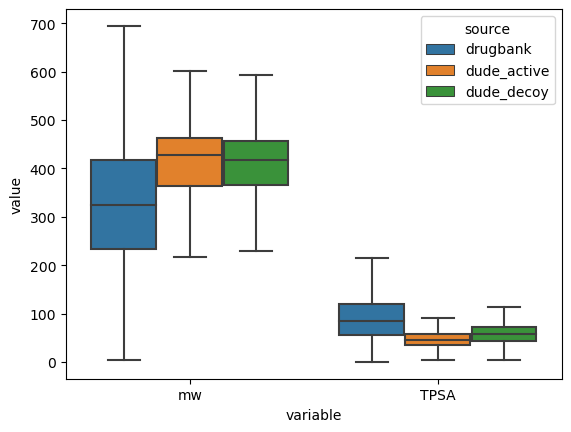

In [34]:
# for mw and tpsa plot the distribution of the columns withou outliers
sns.boxplot(x='variable', y='value', hue='source', data=joint_df_melt[joint_df_melt['variable'].isin(['mw', 'TPSA'])], showfliers=False)
plt.show()

In [36]:
# add new column 'Lipinski' to the data frame joint_df_calc and filter the data frame for Lipinski violations

joint_df_calc['Lipinski'] = joint_df_calc.apply(lambda x: x['HBA'] <= 10 and x['HBD'] <= 5 and x['RB'] <= 10 and x['mw'] <= 500, axis=1)
# if column lipinski is False, then the molecule violates the Lipinski rule of five

joint_df_calc[joint_df_calc['Lipinski'] == False] # show the molecules that violate the Lipinski rule of five

# create a new data frame with only the molecules that do not violate the Lipinski rule of five
joint_df_calc_lipinski = joint_df_calc[joint_df_calc['Lipinski'] == True]
joint_df_calc_lipinski.head()

,mol,source,mw,rings,HBA,HBD,logP,TPSA,RB,Lipinski
7,<rdkit.Chem.rdchem.Mol object at 0x7fc674123290>,drugbank,247.024574,1,7,3,0.51742,116.95,4,True
10,<rdkit.Chem.rdchem.Mol object at 0x7fc6741233e0>,drugbank,155.069477,1,5,4,-0.63590,92.00,3,True
12,<rdkit.Chem.rdchem.Mol object at 0x7fc6741234c0>,drugbank,88.016044,0,3,1,-0.34000,54.37,1,True
13,<rdkit.Chem.rdchem.Mol object at 0x7fc674122dc0>,drugbank,165.078979,1,3,3,0.64100,63.32,3,True
14,<rdkit.Chem.rdchem.Mol object at 0x7fc674122d50>,drugbank,244.088163,2,5,3,0.79680,78.43,5,True


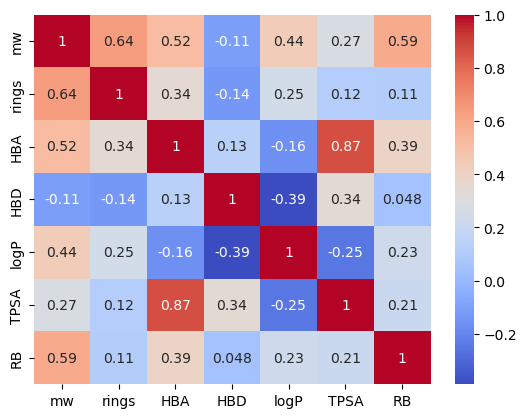

In [39]:
# do jake miry spolu descriptory coreluji
# create a correlation matrix 
corr = joint_df_calc_lipinski[['mw', 'rings', 'HBA', 'HBD', 'logP', 'TPSA', 'RB']].corr()
corr

# plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()